In [38]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

In [39]:
n = 192
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 #assignment, Bacteria 1

#Du, Dv, F, k = 0.00014, 0.00006, 0.035, 0.065 # Bacteria 2
#Du, Dv, F, k = 0.00016, 0.00008, 0.060, 0.062 # Coral
#Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062 # Fingerprint
#Du, Dv, F, k = 0.00010, 0.00010, 0.018, 0.050 # Spirals
#Du, Dv, F, k = 0.00012, 0.00008, 0.020, 0.050 # Spirals Dense
#Du, Dv, F, k = 0.00010, 0.00016, 0.020, 0.050 # Spirals Fast
#Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.055 # Unstable
#Du, Dv, F, k = 0.00016, 0.00008, 0.050, 0.065 # Worms 1
#Du, Dv, F, k = 0.00016, 0.00008, 0.054, 0.063 # Worms 2
#Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish

dh = 5/(n-1)
T = 8000
dt = (9/40)*dh**2/(max(Du,Dv))
nt = int(T/dt)
print(nt)
print(dt)

8301
0.9636865765741071


In [40]:
uvinit = numpy.load('./data/uvinitial.npz')
U_init = uvinit['U']
V_init = uvinit['V']
#print(U_init)

In [41]:
def ftcs(Du, Dv, F, k, U, V, dt, dh, nt):
    """Forward time, central space discretization for explicit Gray-Scott Model
            of Reaction - Diffusion equations
        
        Parameters:
            Du - Diffusion Rate for u type particles
            Dv  - Diffusion rate for v type particles
            U  - concentration of u type particles (matrix)
            V - concentration of v type particles
            dt - time step size
            dh - spatial step size (assume dx=dy=dh)
            nt - number of time steps
        
        Returns:
            U, V - concentration of particles after nt time steps.
    """
    #U = U_init.copy()
    #V = V_init.copy()
    for t in range(nt):
        Un = U.copy()
        Vn = V.copy()
        
        U[1:-1,1:-1] = Un[1:-1, 1:-1]+ dt*(Du*((Un[2:,1:-1]-2*Un[1:-1,1:-1]+Un[:-2,1:-1])/dh**2+\
                                     (Un[1:-1,2:] - 2*Un[1:-1, 1:-1] + Un[1:-1,:-2])/dh**2)\
                                  -Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2 + F*(1-Un[1:-1,1:-1]))
        V[1:-1,1:-1] =  Vn[1:-1, 1:-1] + dt*(Dv*((Vn[2:,1:-1]-2*Vn[1:-1,1:-1]+Vn[:-2,1:-1])/dh**2 +\
                                                (Vn[1:-1,2:] - 2*Vn[1:-1, 1:-1] + Vn[1:-1,:-2])/dh**2)\
                                            +Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2 - (F+k)*Vn[1:-1,1:-1])
        U[0,:] = U[1,:]
        U[:,0] = U[:,1]
        U[-1,:] = U[-2,:]
        U[:,-1] = U[:,-2]
        V[0,:] = V[1,:]
        V[:,0] = V[:,1]
        V[-1,:] = V[-2,:]
        V[:,-1] = V[:,-2]
        
#        print(U)
    return U,V

In [42]:
#print(U_init)

In [43]:
U,V = ftcs(Du, Dv, F, k, U_init.copy(), V_init.copy(), dt, dh, nt)
#print(U)
#print(V)

U[100,::40]

array([ 0.92469521,  0.85013834,  0.66815621,  0.90196481,  0.9039502 ])

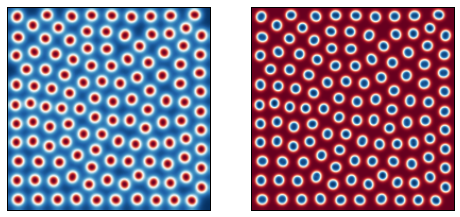

In [44]:
#visualize results
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
